# Pdf templates with python


While running a consultancy I found myself in the very desireable position of issuing invoices to customers. This was great! People could receive a full breakdown of what they were paying for and I got to play the sometimes enviable role of a self employed developer.

My consultancy issued weekly invoices for work done that week. This was quiet favourable for most people since they did not have to approve large budgets from the finance departments. Within the first month though, a problem arose. I was spending a lot of time designing these invoices. There are lots of services like Zoho books that allow you to make templates out of these things but for my case the actual time was being spent in typing out the actual itemizations for the invoices.

The workflow I was following at the time was this:

1. Create a copy of a google drive doc file that served as a template.
2. Read gitlab issues for the project and create a list of items to be added in the invoice.
3. Download the doc as a pdf and email to the client.

While this workflow was okay for 1-4 projects at a time, when I started handling 8-10 projects this process started consuming one hour every week. Hence began our battle to reclaim this one hour every week. Since it was a nice project for me I thought I'd post this here so that other people may learn from the same experience.

## The template

First things first. You need a template in docx format. What I liked to do was to have a google drive doc as a template and use words like `BILL_TO`, `INVOICE_DATE`, `ITEM_LIST`, and `TOTAL_AMOUNT` in the doc as placeholders for the actual information.

The nice thing about docx format is that it's actually a zip file. Since python has a [zipfile module](https://docs.python.org/3/library/zipfile.html) it's easy to work with docx in python for this particular usecase.

This step simply requires that you download this docx template file onto your computer.

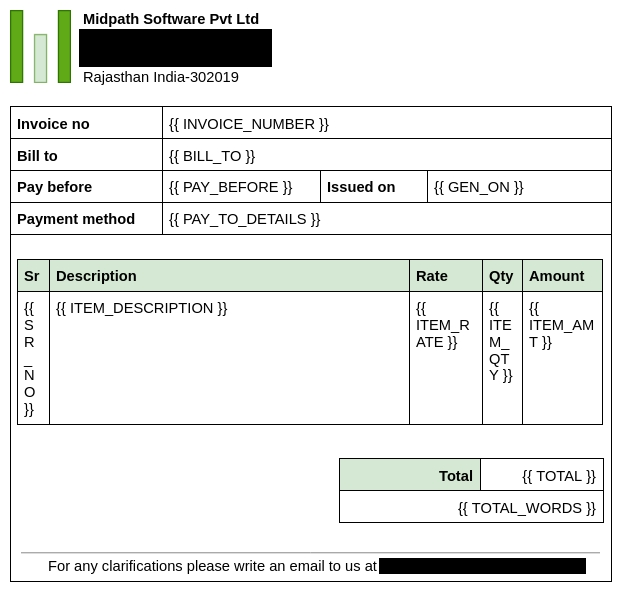

## The invoices

I was using gitlab to manage my projects and so I set up the CI/CD pipelines to ensure that all my merge request titles followed a certain pattern. I used `#<issue number>: Brief description of task` as the template. This template along with squash commits made sure that my main branch only had commits that linked to issues and had brief descriptions of what was acheived. All the intermediate commits of `why is this not working?`, `test are passing`, `making it faster` get collapsed within the merge request and the main branch remains clean thanks to squash commits.

To generate items for the invoice, I picked up the latest commits since the last invoice for the project. This produced a draft for me to edit and was a lot faster than typing up all the information manually. `git log --oneline origin/{target}..{sha}` can be used to show commits since the `sha` commit. Very useful command :D

A draft for the items that had to be put in the invoice meant that I could produce a lot of invoices quickly. All I had to do was proof read and enter the amounts that the client had to pay.

## Filing the template

Since docx is zip readable and the invoice items are available to use in python as a data structure, the next step was to combine the two. When we open the docx file using the zipfile library, we need to look for the `word/document.xml` file within the zip. This is what we need to edit. The rest can be written back to the new file exactly the same as before. For the `word/document.xml` file we have to replace the placeholders that we put in the template with actual values.

For my case, I initially started with trying [Jinja templates](https://jinja.palletsprojects.com/en/3.0.x/templates/). That felt like overkill though so I tried the [re library](https://docs.python.org/3/library/re.html) in python. It still felt like overkill.

The final code I have simply used `string.replace('a', 'b')` and it works well enough for this usecase. What I did was replace all the placeholders in the template with actual values. For example `string.replace('BILL_TO', 'ABC Pvt Ltd')`.

This final replaced docx was written back to the file system. New docx created like a charm :D

## Making a pdf

A pdf was still needed. Docx etc can become very different if you open it on windows, libreoffice, or google drive. A pdf always looks exactly the same. I used libreoffice to convert the docx to a pdf.

```
libreoffice --headless \
  --convert-to pdf {fname}.docx \
  --outdir invoices
```

Tada! I have a pdf that took roughly 5 seconds to create! The time I spent creating invoices went from 1-1.5 hours to 5 minutes of proof reading.

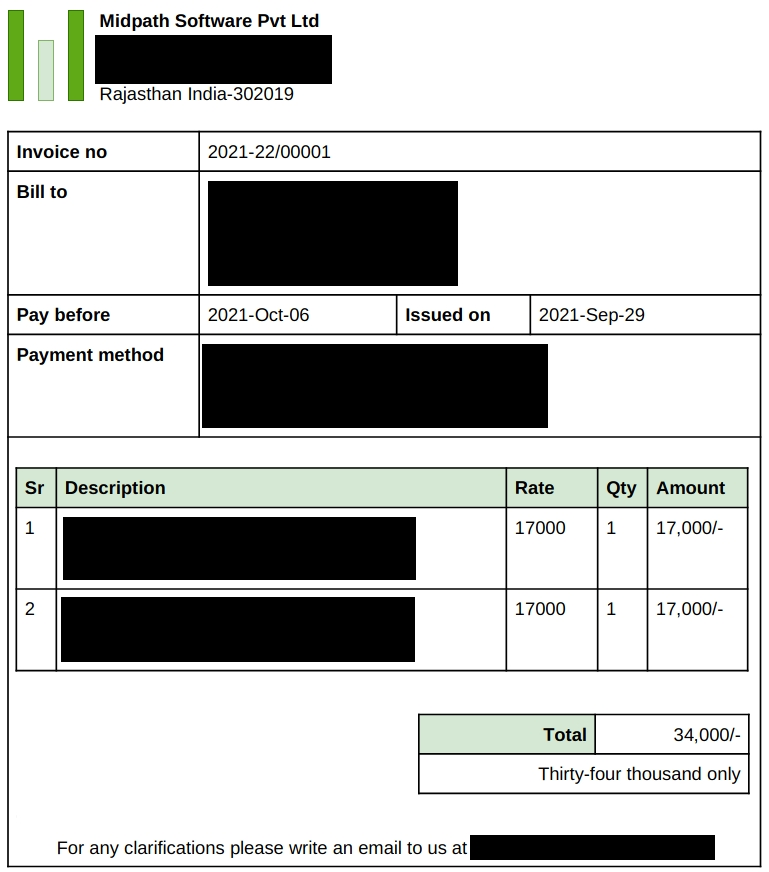

All the code is available at [a gist on github](https://gist.github.com/theSage21/29261e071efd92f701b69ddd56374fa6). If you have questions ask away in the gist or on this post!